In [1]:
## Capstone Project Notebook

--2020-07-05 23:40:44--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-05 23:40:44 (13.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000 

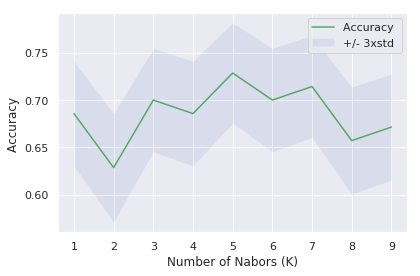

The best accuracy was with 0.7285714285714285 with k= 5


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import csv
import time
import datetime

sns.set()
from sklearn.cluster import KMeans
from sklearn import metrics

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

fields = ['unamed: 0','unamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']



## Converting Data to numeric values. 

df = pd.read_csv('loan_train.csv')
print(df.head())


with open('loan_train.csv','r') as csv_file:
        with open('data_file.csv','w') as file:
            writer= csv.writer(file)
            writer.writerow(fields)
            csv_reader = csv.reader(csv_file)
            i = 0
            for row in csv_reader:
                #if i == 1 :
                   # writer.writerow(row)

                if i > 0 :
                    print(row)
                    j = 0
                    for k in row:
                        if j == 0:
                            zero = row[j]
                           # print(zero)
                        if  j == 1:
                            one = row[j]
                            #print(one)
                        if j == 2:
                            if row[j] == "PAIDOFF":
                                two = 1
                            else:
                                #collection
                                two = 0
                            #print(two)

                        if j == 3:
                            three = row[j]
                            #print(three)
                        if j == 4:
                            fourth = row[j]
                           # print(fourth)
                           # print(row[j])
                        if j == 5:
                            fifth = row[j]
                            dt = datetime.datetime.strptime(row[j], "%m/%d/%Y")
                            fifth = time.mktime(dt.timetuple())
                        if j == 6:
                            #sixth = row[j]
                            #my_date = datetime.strptime()
                            #print(row[j])
                            dt =datetime.datetime.strptime(row[j],"%m/%d/%Y")
                            sixth = time.mktime(dt.timetuple())
                            #print(sixth)

                        if j == 7:
                            seven = row[j]
                        if j == 8:
                            if row[j] == "Bechalor":
                                eight = 0
                            if row[j] == "High School or Below":
                                eight = 1
                            if row[j] == "college":
                                eight = 2
                        if j == 9:
                            if row[j] == "male":
                                nine = 1
                            else:
                                nine = 0


                      # print(row[j])
                        j = j + 1
                    print(zero,one,two,three,fourth,fifth,sixth,seven,eight,nine)
                    writer.writerow([zero,one,two,three,fourth,fifth,sixth,seven,eight,nine])

                i = i + 1
####

df = pd.read_csv('data_file.csv')
print(df.head())


X = df[['Principal','terms','effective_date','due_date','education','age']].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Normalize Values.
Y =  df['loan_status'].values
df['loan_status'].value_counts()


#Splitting the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

print('Train set:',X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
